In [1]:
using Laplacians
using ProfileView

In [2]:
include("../src/samplingSolver.jl")

purge (generic function with 1 method)

In [3]:
n = 100; A = chimera(n,1);

In [4]:
@time buildSolver(A);
@time buildSolver(A);

  0.641443 seconds (654.51 k allocations: 83.962 MB, 2.99% gc time)
  0.066267 seconds (5.65 k allocations: 57.179 MB, 9.59% gc time)


In [5]:
Profile.clear()
Profile.init(n = 10000000)
@time for i in 1:10
    @profile f,gOp,U,d = buildSolver(A);
end

  5.620626 seconds (56.42 k allocations: 571.908 MB, 54.12% gc time)


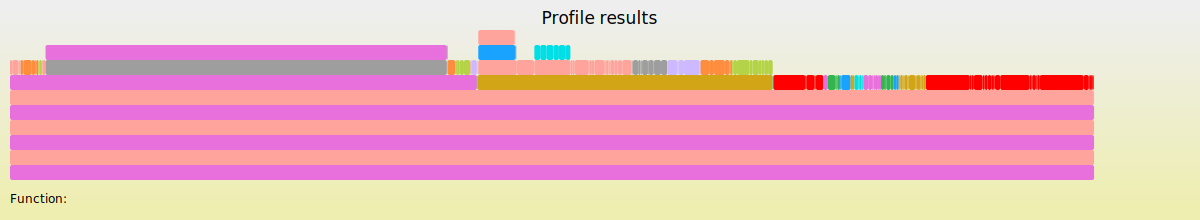

In [6]:
ProfileView.view()

In [7]:
f,gOp,U,d = buildSolver(A);
checkError(gOp)

0.04033851866473022

## Versus another solver

In [8]:
@time f,gOp,U,d = buildSolver(A);

  0.094086 seconds (5.65 k allocations: 57.173 MB, 18.62% gc time)


In [10]:
b = randn(n);

In [11]:
@time x = f(b);

  0.036168 seconds (11.60 k allocations: 577.989 KB)
